In [130]:
import pandas as pd
from src.support_model import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv("datos/prepped_data.csv", index_col=0)

In [132]:
X = df.drop(columns = ["price"])
y = df["price"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [134]:
params_gb = {'n_estimators': [x for x in range(10,60,10)],
            'max_depth': [x for x in range(1,10)],
            'min_samples_split': [x for x in range(3,7)],
            'min_samples_leaf': [x for x in range(3,7)],
            'max_leaf_nodes': [x for x in range(3,11)]}

In [135]:
grid_search_gb = create_model(params=params_gb, X_train=X_train, y_train=y_train, method = GradientBoostingRegressor(random_state=42, learning_rate=0.1), cv = 5)


Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


c:\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [136]:
grid_search_gb.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 50}

In [137]:
gb_estimator = grid_search_gb.best_estimator_

In [138]:
y_test_pred = gb_estimator.predict(X_test)
y_train_pred = gb_estimator.predict(X_train)

pd.DataFrame(metricas(y_train, y_train_pred, y_test, y_test_pred)).T

,r2_score,MAE,MSE,RMSE
train,0.842495,25.795050,1089.690562,33.010461
test,0.573008,38.346583,2236.108143,47.287505


<Axes: xlabel='price'>

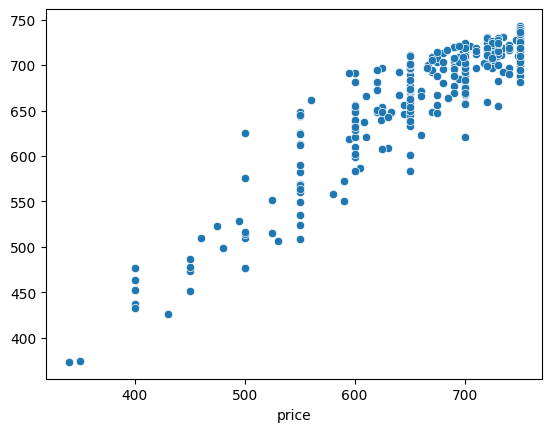

In [139]:
plt.figure()
sns.scatterplot(x = y_train, y = y_train_pred)

In [140]:
pd.DataFrame(gb_estimator.feature_importances_, index=df.drop(columns=["price"]).columns, 
             columns=["Importance"]).sort_values(by = "Importance",ascending=False)

,Importance
distance,0.553329
size,0.188979
province,0.117161
floor_1,0.023857
rooms_2,0.013425
floor_2,0.011356
rooms_1,0.010957
propertyType,0.009655
hasLift_False,0.009185
showAddress_False,0.008934
